In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from mofgraph2vec.trainer.supervised import train
from mofgraph2vec.data.datamodule import DataModuleFactory
from omegaconf import OmegaConf
import matplotlib.pyplot as plt
import torch

/Users/xiaoqi/opt/anaconda3/envs/mofgraph2vec/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
config = OmegaConf.load("../conf/config.yaml")
config.data = OmegaConf.load("../conf/data/nn.yaml")
config.model = OmegaConf.load("../conf/model/nn.yaml")

In [4]:
config.data.nn.label_path = "../data/data.csv"
config.data.nn.embedding_path = "../experiments/unsupervised/wandb/offline-run-20230131_232505-mlil64hw/tmp/embedding.csv"
config.model.max_epochs = 100

In [5]:
model, test_metrics = train(config)

2023-02-01 18:22:37.982 | INFO     | mofgraph2vec.data.datamodule:__init__:52 - Train: 2637 Valid: 294 Test: 326
2023-02-01 18:22:38.852 | INFO     | mofgraph2vec.trainer.supervised:train:32 - Instantiate neural network model. 
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/xiaoqi/opt/anaconda3/envs/mofgraph2vec/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:67: UserWarning: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
  warning_cache.warn(
2023-02-01 18:22:38.889 | INFO  

/Users/xiaoqi/opt/anaconda3/envs/mofgraph2vec/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/Users/xiaoqi/opt/anaconda3/envs/mofgraph2vec/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/Users/xiaoqi/opt/anaconda3/envs/mofgraph2vec/lib/python3.8/site-packages/pytorch_lightning/trainer/trainer.py:1600: PossibleUserWarning: The number of tr

Epoch 99: 100%|██████████| 47/47 [00:01<00:00, 41.05it/s, loss=1.29e-05, v_num=11]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 47/47 [00:01<00:00, 40.86it/s, loss=1.29e-05, v_num=11]

2023-02-01 18:24:27.634 | INFO     | mofgraph2vec.trainer.supervised:train:41 - Start testing
/Users/xiaoqi/opt/anaconda3/envs/mofgraph2vec/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(



Testing DataLoader 0: 100%|██████████| 6/6 [00:00<00:00, 43.13it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss           1.0989989042282104
        test_mae            0.7954165935516357
        test_mse            1.0989989042282104
         test_r2           -0.07893261313438416
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [6]:
model.model.state_dict()["embedding.weight"]

tensor([[-0.1404, -0.0374, -0.0739,  ...,  0.0532,  0.1181,  0.0390],
        [ 0.0717,  0.1115, -0.0390,  ..., -0.0267,  0.1161,  0.1348],
        [ 0.0537, -0.0701, -0.1254,  ...,  0.0102,  0.0310,  0.1184],
        ...,
        [-0.0196, -0.0923,  0.0504,  ..., -0.1003, -0.0218,  0.0843],
        [ 0.0510,  0.1264, -0.0057,  ...,  0.1322,  0.0862,  0.1338],
        [-0.0338, -0.0440,  0.0198,  ...,  0.0550,  0.0948,  0.0928]])

In [5]:
dmf = DataModuleFactory(**config.data.nn)

2023-02-02 09:21:40.199 | INFO     | mofgraph2vec.data.datamodule:__init__:54 - Train: 2637 Valid: 294 Test: 326


In [6]:
#train_ds = dmf.get_train_dataset()
#valid_ds = dmf.get_valid_dataset()
test_ds = dmf.get_test_dataset()

In [14]:
dm = dmf.get_datamodule()

In [27]:
for batch in dm.val_dataloader():
    print(batch)

[tensor([[-0.5300,  0.0709,  0.1555,  ...,  0.0009, -0.1295,  0.1538],
        [-0.0219, -0.0943,  0.2419,  ...,  0.3222, -0.3341,  0.0074],
        [-0.0961, -0.0931,  0.0098,  ...,  0.3609, -0.3662,  0.0299],
        ...,
        [-0.1920,  0.4332,  0.4326,  ...,  0.4929, -0.2842,  0.2608],
        [ 0.3870,  0.2857, -0.2806,  ...,  0.5168, -0.1945,  0.2143],
        [ 0.1568, -0.0417,  0.3553,  ...,  0.5357, -0.2488,  0.2630]]), tensor([-3.1267, -0.9752, -3.0202, -4.4527, -2.9919, -3.2377, -3.3183, -3.3278,
        -4.3492, -2.8445, -3.3515, -4.4645, -4.5874, -3.6918, -4.4895, -4.1444,
        -2.3291, -4.3437, -4.2959, -4.1144, -4.9260, -3.9774, -2.6758, -3.6774,
        -4.1652, -0.9850, -2.9000, -3.8676, -1.8079, -4.1257, -4.5971, -3.7150,
        -1.9947, -3.1113, -3.6134, -3.4246, -2.9906, -3.9796, -2.4908, -2.5120,
        -2.2465, -4.8128, -1.6422, -3.9230, -4.4939, -4.2966, -4.7706, -2.7655,
        -4.6990, -2.4017, -3.9816, -3.6069, -2.7326, -4.5916, -0.4244, -3.9933,
    

In [14]:
for id, data in enumerate(loader):
    print(data[1])

tensor([-4.2348, -5.1146, -4.0944, -1.2565, -3.6918, -4.4586, -3.4677, -3.0180,
        -4.5425, -4.1139, -3.5944, -3.0332, -3.5892, -3.6031, -4.1242, -2.4309,
        -3.2012, -2.7304, -4.1033, -4.9439, -3.5930, -3.4743, -3.9016, -4.4702,
        -2.7505, -3.8896, -2.3449, -2.9034, -3.5657, -3.9106, -3.8438, -1.9696,
        -1.2073, -3.6204, -0.7340, -4.1397, -3.8814, -4.2909, -4.0257, -4.2936,
        -4.4671, -3.9925, -2.2863, -2.3402, -4.6068, -4.6472, -3.5436, -4.1564,
        -3.7796, -2.7326, -4.0735, -4.2969, -4.6707, -3.8699, -0.8732, -3.1721,
        -2.4714, -3.8488, -4.7041, -2.0450, -3.7921, -3.6262, -4.1261, -3.9274])
tensor([-4.5883, -2.6310, -3.5762, -2.9159, -2.7442, -3.4866, -2.9481, -2.6754,
        -4.5747, -3.4620, -2.9091, -2.3550, -1.7256, -5.0510, -2.5814, -4.4334,
        -2.6920, -4.0892, -2.7463, -2.9735, -4.7311, -3.7958, -3.8813, -3.6883,
        -3.5815, -3.7397, -3.5705, -3.3918, -4.0051, -1.8370, -3.0226, -3.9870,
        -4.0372, -0.4409, -3.9616, -3.5

In [9]:
pred = model(train_ds.vectors).detach().numpy()

In [10]:
trues = train_ds.labels.detach().numpy()

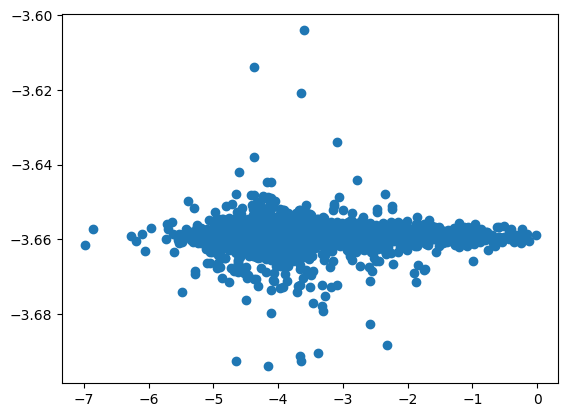

In [11]:
plt.scatter(trues, pred)

In [12]:
import torch.nn as nn

In [13]:
loss = nn.MSELoss()

In [14]:
loss(train_ds.labels[:64], model.model(train_ds.vectors).squeeze(dim=1)[:64])

tensor(1.0586, grad_fn=<MseLossBackward0>)